In [1]:
%matplotlib inline

import os
import sys

WC_ECOLI_DIRECTORY = os.path.expanduser("~/wcEcoli")
sys.path.append(WC_ECOLI_DIRECTORY)

In [2]:
import numpy as np
from wholecell.io.tablereader import TableReader
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8, 6)

In [4]:
import cPickle

with open("/home/acjs/wcEcoli/out/20160301.152504.128116/kb/simData_Most_Fit.cPickle", "rb") as f:
    sim_data = cPickle.load(f)

# Time

In [9]:
tr = TableReader("/home/acjs/wcEcoli/out/20160301.152504.128116/wildtype_000000/000000/generation_000000/000000/simOut/Main/")
time = np.cumsum(tr.readColumn('timeStepSec'))
time = np.insert(time[:-1], 0, 0.)
time = pd.to_datetime(time, unit="s")

# BulkMolecules

In [10]:
tr = TableReader("/home/acjs/wcEcoli/out/20160301.152504.128116/wildtype_000000/000000/generation_000000/000000/simOut/BulkMolecules/")
cols = tr.readColumn('counts')
attributes = tr.readAttribute('objectNames')

In [13]:
data = pd.DataFrame(cols,index=time, columns=attributes)

In [14]:
data

,CPD-205[n],CPD-205[j],CPD-205[w],CPD-205[c],CPD-205[e],CPD-205[m],CPD-205[o],CPD-205[p],CPD-205[l],CPD-205[i],...,polymerized UTP[n],polymerized UTP[j],polymerized UTP[w],polymerized UTP[c],polymerized UTP[e],polymerized UTP[m],polymerized UTP[o],polymerized UTP[p],polymerized UTP[l],polymerized UTP[i]
1970-01-01 00:00:00.000000000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1970-01-01 00:00:00.200000000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1970-01-01 00:00:00.400000000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1970-01-01 00:00:00.600000000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1970-01-01 00:00:00.800000000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1970-01-01 00:00:01.000000000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1970-01-01 00:00:01.820313000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1970-01-01 00:00:02.640625000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1970-01-01 00:00:03.460938000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1970-01-01 00:00:04.281250000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
sums = data.sum()
sums.sort_values(ascending=False, inplace=True)

In [10]:
sums[1:10].plot.hexbin()

AttributeError: 'SeriesPlotMethods' object has no attribute 'hexbin'

In [6]:
tr = TableReader("/home/acjs/wcEcoli/out/20160301.152504.128116/wildtype_000000/000000/generation_000000/000000/simOut/EnzymeKinetics/")

In [33]:
class Data:
    pass

data = Data()

In [48]:
reactionIDs = tr.readAttribute('reactionIDs')
constraintToReaction = tr.readAttribute('constraintToReactionDict')
constraintIDs = tr.readAttribute('constraintIDs')
metaboliteIDs = sim_data.process.metabolism.metabolitePoolIDs

In [57]:
constraintsLimits = pd.DataFrame(data.allConstraintsLimits, columns=constraintIDs)
countsToMolar = pd.DataFrame(data.countsToMolar)
metaboliteConcentrations = pd.DataFrame(data.metaboliteConcentrations, columns=metaboliteIDs)
metaboliteCountsInitial = pd.DataFrame(data.metaboliteCountsInit, columns=metaboliteIDs)
metaboliteCountsFinal = pd.DataFrame(data.metaboliteCountsFinal, columns=metaboliteIDs)
reactionRates = pd.DataFrame(data.reactionRates, columns=reactionIDs)

# FBA

In [3]:
tr = TableReader("/home/acjs/wcEcoli/out/20160301.152504.128116/wildtype_000000/000000/generation_000000/000000/simOut/FBAResults/")

In [4]:
tr.attributeNames()

['reactionIDs', 'outputMoleculeIDs', 'externalMoleculeIDs']

In [12]:
reactionIDs = tr.readAttribute('reactionIDs')
outputMoleculeIDs = tr.readAttribute('outputMoleculeIDs')
externalMoleculeIDs = tr.readAttribute('externalMoleculeIDs')

In [13]:
tr.columnNames()

['outputFluxes',
 'objectiveComponents',
 'externalExchangeFluxes',
 'reactionFluxes',
 'objectiveValue',
 'time',
 'simulationStep']

In [26]:
outputFluxes = pd.DataFrame(tr.readColumn('outputFluxes'), index=time, columns=outputMoleculeIDs)
objectiveComponents = pd.DataFrame(tr.readColumn('objectiveComponents'), index=time, columns=outputMoleculeIDs)
externalExchangeFluxes = pd.DataFrame(tr.readColumn('externalExchangeFluxes'), index=time, columns=externalMoleculeIDs)
reactionFluxes = pd.DataFrame(tr.readColumn('reactionFluxes'), index=time, columns=reactionIDs)

# Growth Limits

In [48]:
tr = TableReader("/home/acjs/wcEcoli/out/20160301.152504.128116/wildtype_000000/000000/generation_000000/000000/simOut/GrowthLimits/")

In [62]:
tr.columnNames()

['aaPoolSize',
 'aaRequestSize',
 'aasUsed',
 'ntpAllocated',
 'aaAllocated',
 'gtpAllocated',
 'gtpPoolSize',
 'time',
 'ntpPoolSize',
 'simulationStep',
 'ntpRequestSize',
 'ntpUsed',
 'gtpUsed',
 'gtpRequestSize']

In [70]:
gl = Data()
for col in tr.columnNames():
    if col.startswith('aa'):
        setattr(gl, col, pd.DataFrame(tr.readColumn(col), index=time, columns=sim_data.moleculeGroups.aaIDs))
    elif col.startswith('ntp'):
        setattr(gl, col, pd.DataFrame(tr.readColumn(col), index=time, columns=sim_data.moleculeGroups.ntpIds))
    elif col.startswith('gtp'):
         setattr(gl, col, pd.DataFrame(tr.readColumn(col), index=time, columns=['GTP[c]']))

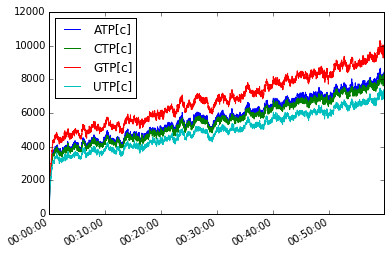

In [66]:
gl.ntpUsed.plot()

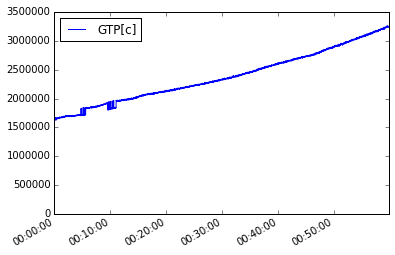

In [71]:
gl.gtpUsed.plot()

# Mass

In [75]:
tr = TableReader("/home/acjs/wcEcoli/out/20160301.152504.128116/wildtype_000000/000000/generation_000000/000000/simOut/Mass/")

In [77]:
tr.attributeNames()

['water_units',
 'rna_units',
 'nucleoid_units',
 'growth_units',
 'processNames',
 'smallMoleculeMass',
 'cellDry_units',
 'metabolite_units',
 'cell_units',
 'protein_units']

In [82]:
processNames = tr.readAttribute('processNames')

In [76]:
tr.columnNames()

['dnaMass',
 'tRnaMass',
 'growth',
 'waterMass',
 'relProcessMassDifferences',
 'rnaMass',
 'smallMoleculeMass',
 'mRnaMass',
 'cellMass',
 'time',
 'proteinMass',
 'simulationStep',
 'rRnaMass',
 'processMassDifferences',
 'dryMass',
 'instantaniousGrowthRate']

In [84]:
mass = Data()
for col in tr.columnNames():
    if col.endswith("rocessMassDifferences"):
        setattr(mass, col, pd.DataFrame(tr.readColumn(col), index=time, columns=processNames))
    else:
        setattr(mass, col, pd.DataFrame(tr.readColumn(col), index=time))

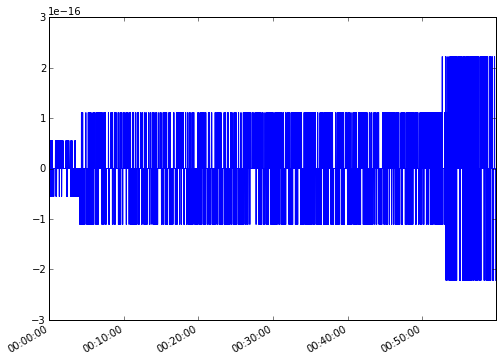

In [90]:
mass.processMassDifferences['RnaDegradation'].plot()

# ReplicationData

In [94]:
tr = TableReader("/home/acjs/wcEcoli/out/20160301.152504.128116/wildtype_000000/000000/generation_000000/000000/simOut/ReplicationData/")

In [106]:
tr.attributeNames()

[]

In [96]:
tr.columnNames()

['criticalMassPerOriC',
 'diffFactorActive',
 'lastPassedCriticalMass',
 'numberOfOric',
 'sequenceIdx',
 'refractionOver',
 'sequenceLength']

In [98]:
replicationData = Data()
for col in tr.columnNames():
    setattr(replicationData, col, pd.DataFrame(tr.readColumn(col), index=time))
    print col, getattr(replicationData, col).shape

criticalMassPerOriC (3869, 1)
diffFactorActive (3869, 1)
lastPassedCriticalMass (3869, 1)
numberOfOric (3869, 1)
sequenceIdx (3869, 50)
refractionOver (3869, 1)
sequenceLength (3869, 50)


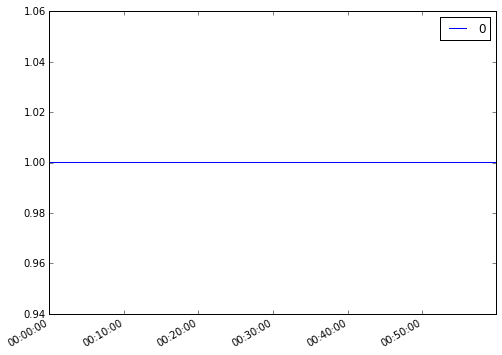

In [109]:
replicationData.sequenceLength[replicationData.sequenceLength == -1] = np.NaN
replicationData.refractionOver.plot()

# Ribosome Data

In [68]:
tr = TableReader("/home/acjs/wcEcoli/out/20160301.152504.128116/wildtype_000000/000000/generation_000000/000000/simOut/RibosomeData/")
print tr.attributeNames()
print tr.columnNames()

[]
['expectedElongations', 'stallingRateTotal', 'didTerminate', 'aaCounts', 'actualElongations', 'stallingRateMean', 'effectiveElongationRate', 'terminationLoss', 'stallingRateStd', 'aaCountInSequence', 'time', 'fractionStalled', 'simulationStep', 'didInitialize']


In [71]:
ribosomeData = Data()
for col in tr.columnNames():
    setattr(ribosomeData, col, pd.DataFrame(tr.readColumn(col), index=time))
    
    if col.startswith('aa'):
        getattr(ribosomeData, col).columns = sim_data.moleculeGroups.aaIDs
        
    print col, getattr(ribosomeData, col).shape

expectedElongations (3869, 1)
stallingRateTotal (3869, 1)
didTerminate (3869, 1)
aaCounts (3869, 21)
actualElongations (3869, 1)
stallingRateMean (3869, 1)
effectiveElongationRate (3869, 1)
terminationLoss (3869, 1)
stallingRateStd (3869, 1)
aaCountInSequence (3869, 21)
time (3869, 1)
fractionStalled (3869, 1)
simulationStep (3869, 1)
didInitialize (3869, 1)


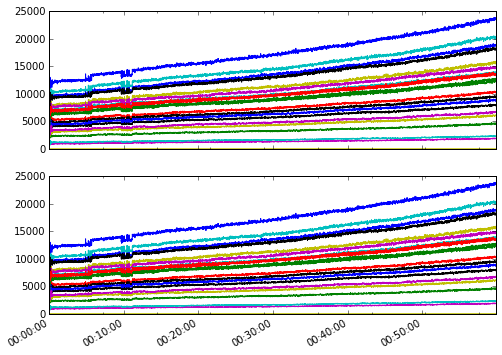

In [84]:
f, ax = plt.subplots(2, sharex=True)
ribosomeData.aaCounts.plot(legend=False, ax=ax[0])
ribosomeData.aaCountInSequence.plot(legend=False, ax=ax[1])

# RNA Degradation

In [43]:
tr = TableReader("/home/acjs/wcEcoli/out/20160301.152504.128116/wildtype_000000/000000/generation_000000/000000/simOut/RnaDegradationListener/")
print tr.attributeNames()
print tr.columnNames()

['countRnaDegraded', 'nucleotidesFromDegradation', 'FractionActiveEndoRNases']
['countRnaDegraded', 'time', 'simulationStep', 'nucleotidesFromDegradation', 'FractionActiveEndoRNases']


In [56]:
sim_data.process.transcription.rnaData["id"]

(4558,)

In [57]:
rnaDegradationData = Data()
for col in tr.columnNames():
    setattr(rnaDegradationData, col, pd.DataFrame(tr.readColumn(col), index=time))
    print col, getattr(rnaDegradationData, col).shape
    
rnaDegradationData.countRnaDegraded.columns = sim_data.process.transcription.rnaData["id"]

countRnaDegraded (3869, 4558)
time (3869, 1)
simulationStep (3869, 1)
nucleotidesFromDegradation (3869, 1)
FractionActiveEndoRNases (3869, 1)


ERROR! Session/line number was not unique in database. History logging moved to new session 136


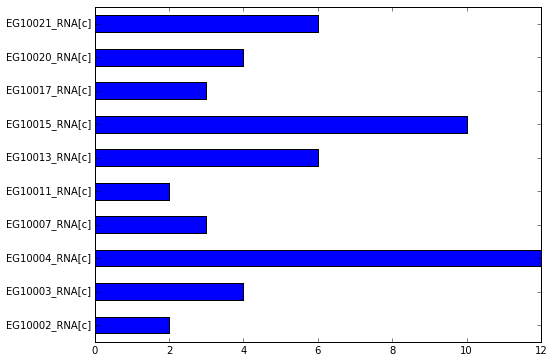

In [63]:
rnaDegradationData.countRnaDegraded[rnaDegradationData.countRnaDegraded.sum().nonzero()[0]].iloc[:,:10].sum().plot.barh()

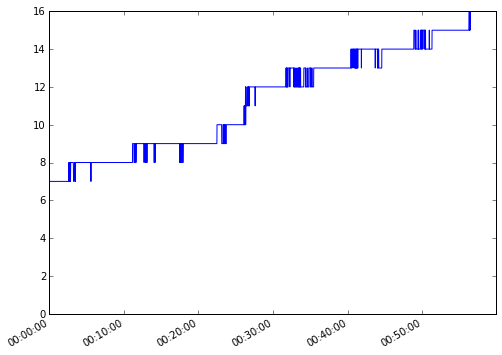

In [67]:
rnaDegradationData.countRnaDegraded.sum(axis=1).plot()

# RnapData

In [16]:
tr = TableReader("/home/acjs/wcEcoli/out/20160301.152504.128116/wildtype_000000/000000/generation_000000/000000/simOut/RnapData//")

In [37]:
rnapData = Data()
for col in tr.columnNames():
    if col.startswith('ntp'):
        continue # These are broken
        
    setattr(rnapData, col, pd.DataFrame(tr.readColumn(col), index=time))

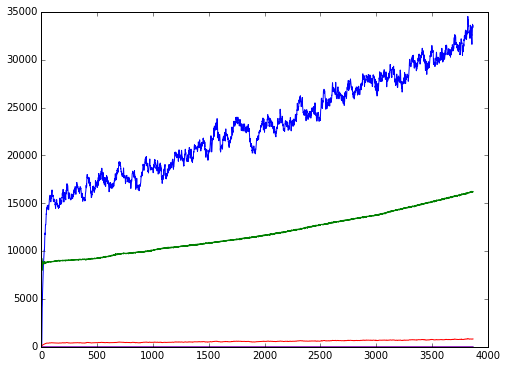

In [41]:
# rnapData.actualElongations.plot()
plt.plot(rnapData.actualElongations)
plt.plot(uniqueMoleculeCounts)

# Unique Molecules

In [39]:
tr = TableReader("/home/acjs/wcEcoli/out/20160301.152504.128116/wildtype_000000/000000/generation_000000/000000/simOut/UniqueMoleculeCounts/")

In [123]:
tr.attributeNames()

['uniqueMoleculeIds']

In [124]:
tr.columnNames()

['uniqueMoleculeCounts', 'time', 'simulationStep']

In [40]:
uniqueMoleculeCounts = pd.DataFrame(tr.readColumn('uniqueMoleculeCounts'), index=time, columns=tr.readAttribute('uniqueMoleculeIds'))

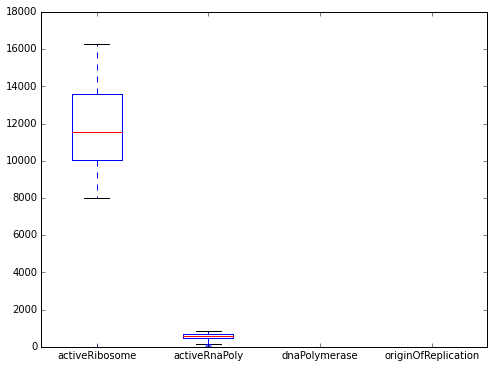

In [130]:
uniqueMoleculeCounts.plot(kind='box')

In [5]:
import models.ecoli.analysis.readers.reader as reader

In [6]:
reload(reader)

<module 'models.ecoli.analysis.readers.reader' from '/home/acjs/wcEcoli/models/ecoli/analysis/readers/reader.pyc'>

In [7]:
r = reader.Reader("/home/acjs/wcEcoli/out/20160301.152504.128116/kb/simData_Fit_1.cPickle", "/home/acjs/wcEcoli/out/20160301.152504.128116/wildtype_000000/000000/generation_000000/000000/simOut/")

In [8]:
r._load_data()

In [9]:
r.bulkMolecules.counts

,CPD-205[n],CPD-205[j],CPD-205[w],CPD-205[c],CPD-205[e],CPD-205[m],CPD-205[o],CPD-205[p],CPD-205[l],CPD-205[i],...,polymerized UTP[n],polymerized UTP[j],polymerized UTP[w],polymerized UTP[c],polymerized UTP[e],polymerized UTP[m],polymerized UTP[o],polymerized UTP[p],polymerized UTP[l],polymerized UTP[i]
1970-01-01 00:00:00.000000000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1970-01-01 00:00:00.200000000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1970-01-01 00:00:00.400000000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1970-01-01 00:00:00.600000000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1970-01-01 00:00:00.800000000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1970-01-01 00:00:01.000000000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1970-01-01 00:00:01.820313000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1970-01-01 00:00:02.640625000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1970-01-01 00:00:03.460938000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1970-01-01 00:00:04.281250000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
